In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [2]:
train = pd.read_csv('data/criminal_train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45718 entries, 0 to 45717
Data columns (total 72 columns):
PERID        45718 non-null int64
IFATHER      45718 non-null int64
NRCH17_2     45718 non-null int64
IRHHSIZ2     45718 non-null int64
IIHHSIZ2     45718 non-null int64
IRKI17_2     45718 non-null int64
IIKI17_2     45718 non-null int64
IRHH65_2     45718 non-null int64
IIHH65_2     45718 non-null int64
PRXRETRY     45718 non-null int64
PRXYDATA     45718 non-null int64
MEDICARE     45718 non-null int64
CAIDCHIP     45718 non-null int64
CHAMPUS      45718 non-null int64
PRVHLTIN     45718 non-null int64
GRPHLTIN     45718 non-null int64
HLTINNOS     45718 non-null int64
HLCNOTYR     45718 non-null int64
HLCNOTMO     45718 non-null int64
HLCLAST      45718 non-null int64
HLLOSRSN     45718 non-null int64
HLNVCOST     45718 non-null int64
HLNVOFFR     45718 non-null int64
HLNVREF      45718 non-null int64
HLNVNEED     45718 non-null int64
HLNVSOR      45718 non-null int64
IRMCDCH

In [4]:
train['IIHHSIZ2'].value_counts()

 1    45675
 3       41
-1        2
Name: IIHHSIZ2, dtype: int64

In [5]:
train['IFATHER'].value_counts()

 4    34873
 1     7780
 2     3050
 3       13
-1        2
Name: IFATHER, dtype: int64

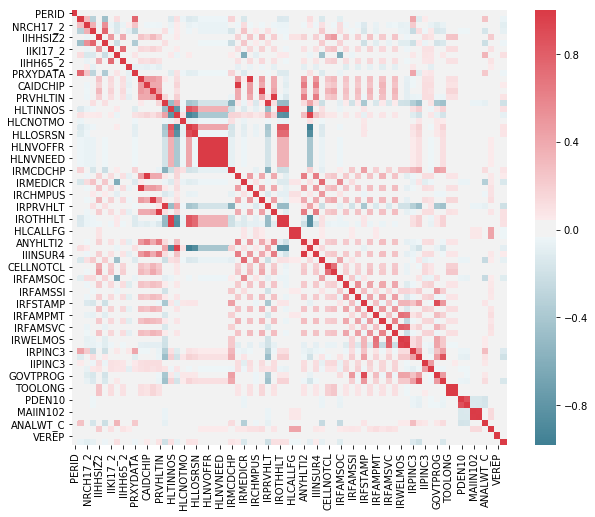

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [7]:
cols = [name for name in train.columns if name!='Criminal']

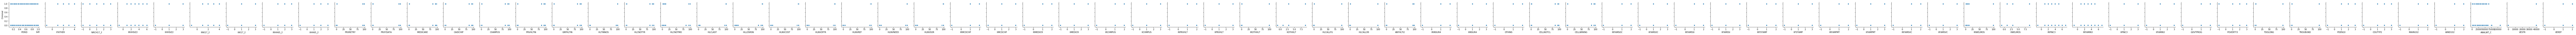

In [ ]:
plot = sns.pairplot(data=train,x_vars=cols,y_vars=['Criminal'])

In [ ]:
sns.pairplot(train)

In [ ]:
ms.matrix(train)

In [ ]:
test = pd.read_csv('data/criminal_test.csv')

In [ ]:
train.describe()

In [ ]:
train['Criminal'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Criminal',axis=1), 
                                                    train['Criminal'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=1000)
model.fit(X_train,y_train)

In [ ]:
'''from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)'''

In [ ]:
test.head()

In [ ]:
predict =  model.predict(test)

In [ ]:
predict = pd.DataFrame(predict,columns=['Criminal'])
predict['Criminal'].value_counts()

In [ ]:
result = pd.DataFrame(test['PERID'],columns=['PERID'])

In [ ]:
result['Criminal']=predict['Criminal']

In [ ]:
#result = pd.concat([result,predict],axis=1)

In [ ]:
result.to_csv('final_predictions_rfc.csv',index=False)